# Analysis of Spotify Data - Data Analysis (EDA)

Data source & data preparation: see MySpotifyData_DataPreparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go

**1) Number of songs in each playlist - Which playlist contains the most songs?** (15.02.2021)

In [2]:
playlists_songs = pd.read_csv("C:/Users/Agnieszka/Downloads/Datasets/Music/songs_in_playlists.csv")
playlists_songs.drop(columns = "Unnamed: 0", inplace=True)
playlists_songs.head()

,PlaylistName,Songs
0,House (all),362
1,Afro House,319
2,Polskie,304
3,Hip Hop,210
4,Oldies,183


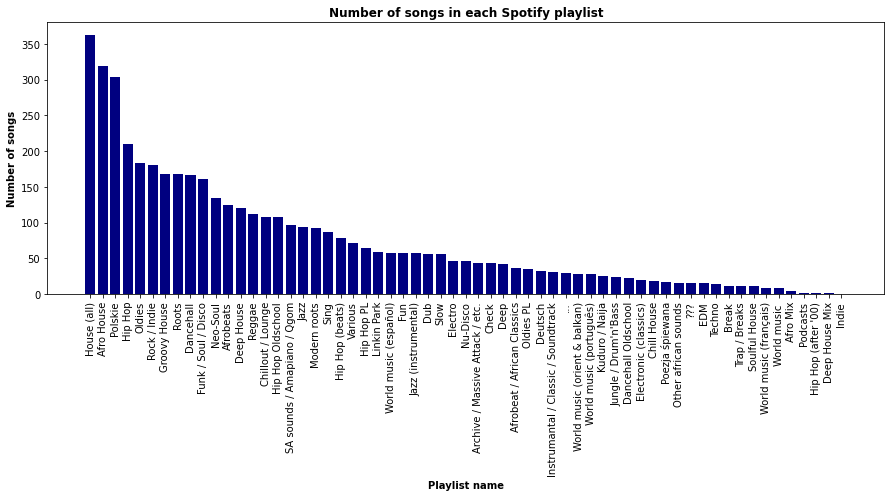

In [33]:
fig = plt.figure(figsize = (15, 5))

plt.bar(playlists_songs["PlaylistName"], playlists_songs["Songs"], color="navy")
plt.xticks(rotation= "vertical")
plt.xlabel("Playlist name", fontweight='bold')
plt.ylabel("Number of songs", fontweight='bold')
plt.title("Number of songs in each Spotify playlist", fontweight='bold')
plt.show()

**2) Most played artists between 02/2020 and 02/2021**

In [4]:
artists_2020 = pd.read_csv("C:/Users/Agnieszka/Downloads/Datasets/Music/StreamTime_ArtistNames.csv", parse_dates=[2])
artists_2020.drop(columns = "Unnamed: 0", inplace=True)
artists_2020.head()           

,ArtistNames,StreamTime
0,Klevakeys,2020-02-02 23:25:00
1,Shakarchi & Stranéus,2020-02-13 17:33:00
2,Dennis Ferrer,2020-02-14 11:34:00
3,Renato Xtrova,2020-02-14 12:40:00
4,Demuir,2020-02-15 11:29:00


In [14]:
artists_count = artists_2020.groupby(["ArtistNames"]).count().sort_values("StreamTime", ascending=False)
artists_count.reset_index(inplace=True)
artists_top20 = artists_count.head(20)

In [45]:
import matplotlib as mtl
mtl.__version__

'3.3.4'

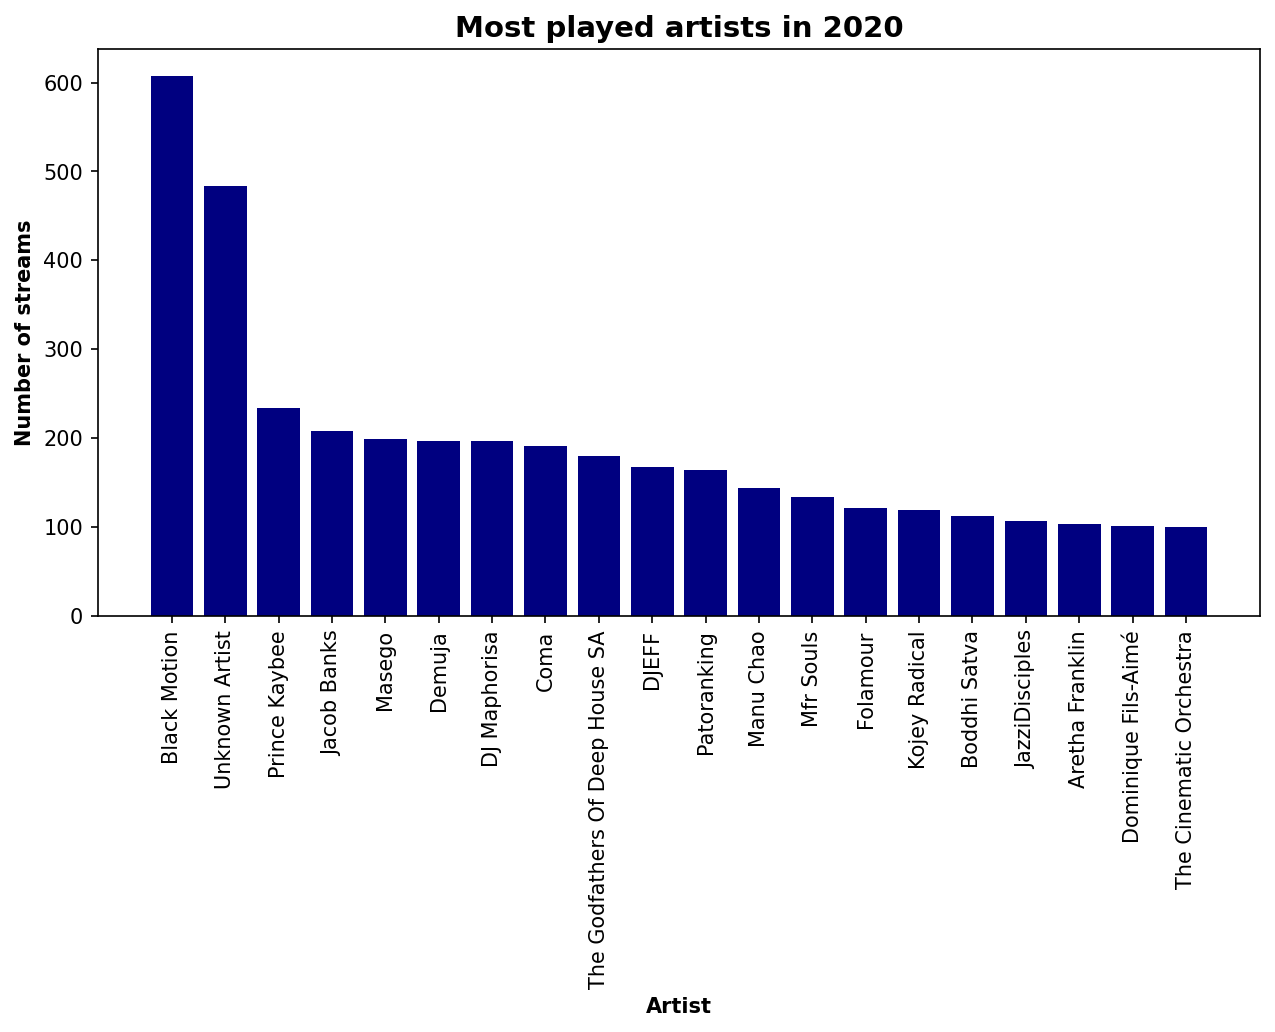

In [48]:
fig, ax = plt.subplots(figsize = (10,5), dpi=150)
#ax = fig.add_subplot()

ax.bar(artists_top20["ArtistNames"], artists_top20["StreamTime"], color ="navy")
ax.set_xlabel("Artist", fontweight='bold')
ax.tick_params(axis="x", rotation=90)
ax.set_ylabel("Number of streams", fontweight='bold')
ax.set_title("Most played artists in 2020", fontsize=14, fontweight='bold')
plt.show()

In [34]:
artists_2020["Month"]= artists_2020["StreamTime"].dt.month

In [59]:
artists_month = artists_2020.groupby(["Month", "ArtistNames"]).count().sort_values(["Month", "StreamTime"], ascending=False)
artists_month.head()

StreamTime
Month ArtistNames                               
12    Unknown Artist                          33
      Black Motion                            23
      Ja i moje przyjaciółki idiotki          18
      Jacob Banks                             17
      Coma                                    16

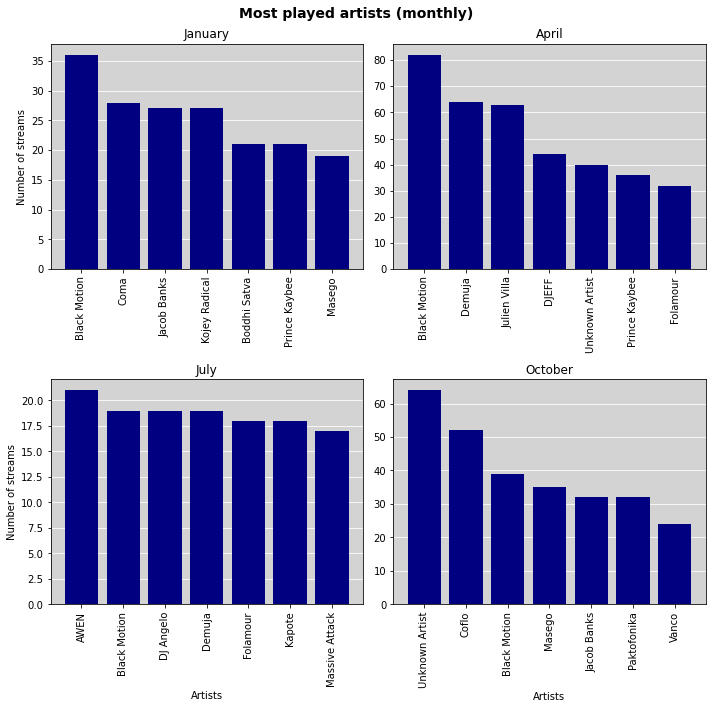

In [93]:
#artists_month[0][0:4]
#artists_month.iloc[[0], slice([0:4])]

fig, ax = plt.subplots(2,2, figsize=(10,10))
fig.suptitle("Most played artists (monthly)", fontsize=14, fontweight="bold")

January = artists_month.loc[1][0:7]

ax[0,0].bar(January.index.values, January["StreamTime"], color = "navy", zorder=3)
ax[0,0].set_facecolor("lightgrey")
ax[0,0].grid(color="white", axis="y", zorder=0)
ax[0,0].tick_params(axis="x", rotation=90)
ax[0,0].set_title("January")
ax[0,0].set_ylabel("Number of streams")

July = artists_month.loc[7][0:7]

ax[1,0].bar(July.index.values, July["StreamTime"], color = "navy", zorder=3)
ax[1,0].set_facecolor("lightgrey")
ax[1,0].grid(color="white", axis="y", zorder=0)
ax[1,0].tick_params(axis="x", rotation=90)
ax[1,0].set_title("July")
ax[1,0].set_ylabel("Number of streams")
ax[1,0].set_xlabel("Artists")

April = artists_month.loc[4][0:7]

ax[0,1].bar(April.index.values, April["StreamTime"], color = "navy", zorder=3) 
ax[0,1].set_facecolor("lightgrey")
ax[0,1].grid(color="white", axis="y", zorder=0)
ax[0,1].tick_params(axis="x", rotation=90)
ax[0,1].set_title("April")

October = artists_month.loc[10][0:7]

ax[1,1].bar(October.index.values, October["StreamTime"], color = "navy", zorder=3)
ax[1,1].set_facecolor("lightgrey")
ax[1,1].grid(color="white", axis="y", zorder=0)
ax[1,1].tick_params(axis="x", rotation=90)
ax[1,1].set_title("October")
ax[1,1].set_xlabel("Artists")

plt.tight_layout()
plt.show()

**3) When do I usually listen to Spotify?**

In [94]:
Stream_2020 = pd.read_csv("C:/Users/Agnieszka/Downloads/Datasets/Music/StreamTime_ArtistNames.csv", parse_dates=[2])
Stream_2020.drop(columns = "Unnamed: 0", inplace=True)
Stream_2020.head()

,ArtistNames,StreamTime
0,Klevakeys,2020-02-02 23:25:00
1,Shakarchi & Stranéus,2020-02-13 17:33:00
2,Dennis Ferrer,2020-02-14 11:34:00
3,Renato Xtrova,2020-02-14 12:40:00
4,Demuir,2020-02-15 11:29:00


In [4]:
Stream_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27988 entries, 0 to 27987
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ArtistNames  27988 non-null  object        
 1   StreamTime   27988 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 437.4+ KB


In [ ]:
# Split StreamTime -> Format: 2020-02-02 23:25 ...dt.date / dt.time -> strings

In [95]:
Stream_2020["Hour"] = Stream_2020["StreamTime"].dt.hour
Stream_2020.head()

,ArtistNames,StreamTime,Hour
0,Klevakeys,2020-02-02 23:25:00,23
1,Shakarchi & Stranéus,2020-02-13 17:33:00,17
2,Dennis Ferrer,2020-02-14 11:34:00,11
3,Renato Xtrova,2020-02-14 12:40:00,12
4,Demuir,2020-02-15 11:29:00,11


In [96]:
Stream_2020["Weekday"] = Stream_2020["StreamTime"].dt.weekday
Stream_2020.head()

,ArtistNames,StreamTime,Hour,Weekday
0,Klevakeys,2020-02-02 23:25:00,23,6
1,Shakarchi & Stranéus,2020-02-13 17:33:00,17,3
2,Dennis Ferrer,2020-02-14 11:34:00,11,4
3,Renato Xtrova,2020-02-14 12:40:00,12,4
4,Demuir,2020-02-15 11:29:00,11,5


In [97]:
Stream_2020["Weekday_day"] = Stream_2020["Weekday"].astype("category").cat.rename_categories({0: "Monday",
            1: "Tuesday",
            2: "Wednesday",
            3: "Thursday",
            4: "Friday",
            5: "Saturday",
            6: "Sunday"})
Stream_2020.head()

,ArtistNames,StreamTime,Hour,Weekday,Weekday_day
0,Klevakeys,2020-02-02 23:25:00,23,6,Sunday
1,Shakarchi & Stranéus,2020-02-13 17:33:00,17,3,Thursday
2,Dennis Ferrer,2020-02-14 11:34:00,11,4,Friday
3,Renato Xtrova,2020-02-14 12:40:00,12,4,Friday
4,Demuir,2020-02-15 11:29:00,11,5,Saturday


In [ ]:
#Stream_2020["Month"] = Stream_2020["StreamTime"].dt.month
#Stream_2020.head()

In [98]:
Stream_2020["Month"] = Stream_2020["StreamTime"].dt.month_name()
Stream_2020.head()

,ArtistNames,StreamTime,Hour,Weekday,Weekday_day,Month
0,Klevakeys,2020-02-02 23:25:00,23,6,Sunday,February
1,Shakarchi & Stranéus,2020-02-13 17:33:00,17,3,Thursday,February
2,Dennis Ferrer,2020-02-14 11:34:00,11,4,Friday,February
3,Renato Xtrova,2020-02-14 12:40:00,12,4,Friday,February
4,Demuir,2020-02-15 11:29:00,11,5,Saturday,February


In [101]:
Hour = Stream_2020.groupby(["Hour"]).count() #.sort_values("Month", ascending=False)

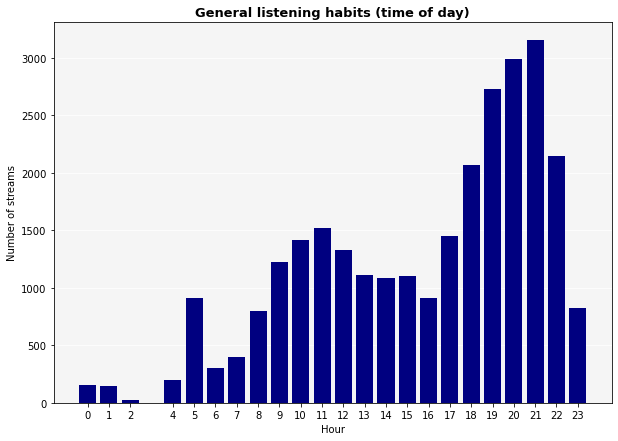

In [190]:
fig, ax = plt.subplots(figsize=(10,7))

ax.bar(Hour.index.values, Hour["Weekday"], color="navy", zorder=3)
ax.set_title("General listening habits (time of day)", fontsize=13, fontweight="bold")
ax.set_ylabel("Number of streams")
ax.set_xlabel("Hour")
ax.set_xticks(Hour.index.values)
ax.set_facecolor("whitesmoke")
ax.grid(color="white", axis="y", zorder=0)

plt.show()

In [117]:
Weekday = Stream_2020.groupby(["Weekday_day"]).count()#.sort_values("Month", ascending=False)
Weekday

,ArtistNames,StreamTime,Hour,Weekday,Month
Weekday_day,,,,,
Monday,3664,3664,3664,3664,3664
Tuesday,3256,3256,3256,3256,3256
Wednesday,3805,3805,3805,3805,3805
Thursday,3307,3307,3307,3307,3307
Friday,3537,3537,3537,3537,3537
Saturday,4590,4590,4590,4590,4590
Sunday,5829,5829,5829,5829,5829


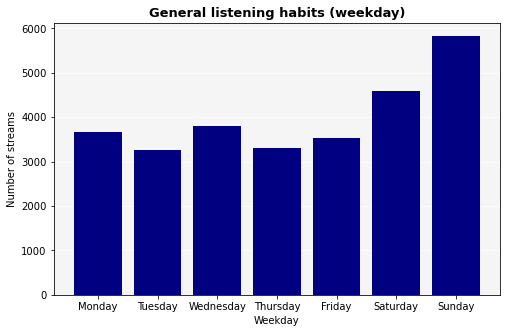

In [191]:
fig, ax = plt.subplots(figsize=(8,5))

ax.bar(Weekday.index.values, Weekday["Month"], color="navy", zorder=3)
ax.set_title("General listening habits (weekday)", fontsize=13, fontweight="bold")
ax.set_ylabel("Number of streams")
ax.set_xlabel("Weekday")
#ax.set_xticks(Hour.index.values)
ax.set_facecolor("whitesmoke")
ax.grid(color="white", axis="y", zorder=0)

plt.show()

In [127]:
Streams_Weekday = Stream_2020.groupby(["Weekday_day", "Hour"]).count().sort_values(["Weekday_day", "Hour"]) #, ascending=False)

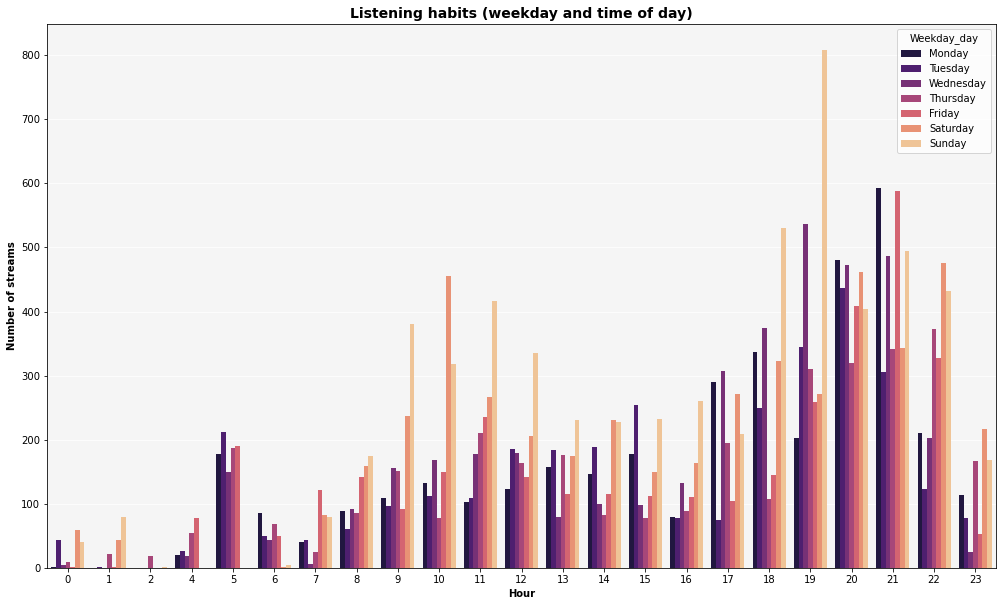

In [192]:
fig, ax = plt.subplots(figsize=(17,10))

ax = sns.countplot(x=Stream_2020["Hour"], hue=Stream_2020["Weekday_day"], palette="magma", zorder=3) #"viridis"
ax.set_title("Listening habits (weekday and time of day)", fontsize=14, fontweight = "bold")
ax.set_ylabel("Number of streams",fontweight = "bold")
ax.set_xlabel("Hour", fontweight = "bold")
ax.set_facecolor("whitesmoke")
ax.grid(color="white", axis="y", zorder=0)


plt.show()


**4) Analysis of the entire dataset (all playlists)**

In [2]:
Dataset_all = pd.read_csv("C:/Users/Agnieszka/Downloads/Datasets/Music/MyDatasets/AllSongsCleaned_EDA.csv")
Dataset_all.drop(columns=(["index", "Unnamed: 0"]), inplace=True)

# Convert object to datetime
#Dataset_all["trackDuration"] = pd.to_datetime(Dataset_all["trackDuration"])
Dataset_all["addedAt"] = pd.to_datetime(Dataset_all["addedAt"])#.dt.tz_convert(None)
Dataset_all["albumReleaseDate"] = pd.to_datetime(Dataset_all["albumReleaseDate"], yearfirst=True)

Dataset_all.head()

,trackName,artistName,trackDuration,addedAt,trackPopularity,artistPopularity,secondaryArtistsNames,artistFollowers,albumRecordLabel,albumReleaseDate,...,Energy,Dance,Loud,Valence,Acoustic,Genre1,Genre2,Genre3,Genre4,Genre5
0,"My Woman, My Everything (feat. Wandecoal)",Patoranking,00:03:53,2018-08-19 20:44:37,54,61.0,Wande Coal,149884.0,Greensleeves Records,2015-07-06,...,85.0,90.0,-3.0,63.0,4.0,Afro dancehall,Afropop,Azontobeats,Gqom,Nigerian pop
1,Pana,Tekno,00:04:02,2018-08-19 20:51:51,59,62.0,NaN,175849.0,Columbia,2016-12-20,...,55.0,55.0,-7.0,66.0,31.0,Afro dancehall,Afropop,Azontobeats,Nigerian hip hop,Nigerian pop
2,Jogodo,Tekno,00:04:23,2018-08-19 20:51:54,44,62.0,NaN,175849.0,MADE MEN MUSIC GROUP,2018-04-19,...,77.0,74.0,-5.0,82.0,38.0,Afro dancehall,Afropop,Azontobeats,Nigerian hip hop,Nigerian pop
3,Duro,Tekno,00:03:32,2018-08-19 20:52:04,0,62.0,NaN,175849.0,Made Men Music Group,2015-06-22,...,84.0,74.0,-4.0,97.0,28.0,Afro dancehall,Afropop,Azontobeats,Nigerian hip hop,Nigerian pop
4,Samantha,Tekno,00:03:49,2018-08-19 20:52:24,42,62.0,NaN,175849.0,MADE MEN MUSIC GROUP,2017-06-09,...,75.0,83.0,-3.0,79.0,3.0,Afro dancehall,Afropop,Azontobeats,Nigerian hip hop,Nigerian pop


In [3]:
Dataset_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3461 entries, 0 to 3460
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trackName              3461 non-null   object        
 1   artistName             3461 non-null   object        
 2   trackDuration          3461 non-null   object        
 3   addedAt                3461 non-null   datetime64[ns]
 4   trackPopularity        3461 non-null   int64         
 5   artistPopularity       3461 non-null   float64       
 6   secondaryArtistsNames  1031 non-null   object        
 7   artistFollowers        3461 non-null   float64       
 8   albumRecordLabel       3461 non-null   object        
 9   albumReleaseDate       3461 non-null   datetime64[ns]
 10  BPM                    3461 non-null   float64       
 11  Energy                 3461 non-null   float64       
 12  Dance                  3461 non-null   float64       
 13  Lou

**Meaning of the features:**

source: https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-several-audio-features

**BPM:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**Energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

**Danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 

**Loudness:** The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

**Valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)

**Acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

**Track popularity:** The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.

**Artist popularity:** The popularity of the artist. The value will be between 0 and 100, with 100 being the most popular. The artist’s popularity is calculated from the popularity of all the artist’s tracks.

Other interesting features that are provided by Spotify but were not provided by "Sort Your Music": 
**instrumentalness** (predicts whether a track contains no vocals), **key**, **liveness** (detects the presence of an audience in the recording), **mode** (indicates the modality (major or minor) of a track), **speechiness** (detects the presence of spoken words in a track), 



- Calculate statistics

In [205]:
# Only numerical values
Dataset_all.describe()

,trackPopularity,artistPopularity,artistFollowers,BPM,Energy,Dance,Loud,Valence,Acoustic
count,3461.000000,3461.000000,3.461000e+03,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000
mean,28.472407,49.672349,1.367865e+06,119.577579,66.715978,68.531060,-8.107483,55.119908,19.751228
std,21.808803,20.796888,4.477960e+06,26.316869,19.631459,16.206167,3.381607,25.207791,25.282592
min,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,-39.000000,0.000000,0.000000
25%,8.000000,36.000000,8.339000e+03,100.000000,54.000000,59.000000,-10.000000,36.000000,1.000000
50%,29.000000,50.000000,5.496500e+04,120.000000,69.000000,72.000000,-8.000000,57.000000,8.000000
75%,45.000000,65.000000,3.937350e+05,130.000000,82.000000,80.000000,-6.000000,76.000000,29.000000
max,85.000000,98.000000,5.343096e+07,212.000000,100.000000,98.000000,-1.000000,99.000000,100.000000


In [206]:
Dataset_all.describe(include="all", exlcl)

<ipython-input-206-26f58465478e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Dataset_all.describe(include="all")
<ipython-input-206-26f58465478e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Dataset_all.describe(include="all")


,trackName,artistName,trackDuration,addedAt,trackPopularity,artistPopularity,secondaryArtistsNames,artistFollowers,albumRecordLabel,albumReleaseDate,...,Energy,Dance,Loud,Valence,Acoustic,Genre1,Genre2,Genre3,Genre4,Genre5
count,3461,3461,3461,3461,3461.000000,3461.000000,1031,3.461000e+03,3461,3461,...,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3054,2340,1728,1238,829
unique,3408,1714,509,3059,NaN,NaN,890,NaN,1354,1392,...,NaN,NaN,NaN,NaN,NaN,406,364,306,240,171
top,Home,Linkin Park,00:03:28,2018-09-10 19:15:42,NaN,NaN,Leszek Możdżer,NaN,Warner Records,2007-01-01 00:00:00,...,NaN,NaN,NaN,NaN,NaN,Afro house,Modern reggae,Post-grunge,Rap metal,Roots reggae
freq,4,54,30,21,NaN,NaN,8,NaN,64,43,...,NaN,NaN,NaN,NaN,NaN,176,102,58,66,37
first,NaN,NaN,NaN,2018-07-25 09:52:48,NaN,NaN,NaN,NaN,NaN,1900-01-01 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2021-03-04 22:45:21,NaN,NaN,NaN,NaN,NaN,2021-02-19 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,28.472407,49.672349,NaN,1.367865e+06,NaN,NaN,...,66.715978,68.531060,-8.107483,55.119908,19.751228,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,21.808803,20.796888,NaN,4.477960e+06,NaN,NaN,...,19.631459,16.206167,3.381607,25.207791,25.282592,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,1.000000e+00,NaN,NaN,...,0.000000,0.000000,-39.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,8.000000,36.000000,NaN,8.339000e+03,NaN,NaN,...,54.000000,59.000000,-10.000000,36.000000,1.000000,NaN,NaN,NaN,NaN,NaN


- Check distribution of the features and relationships between them with pairplot

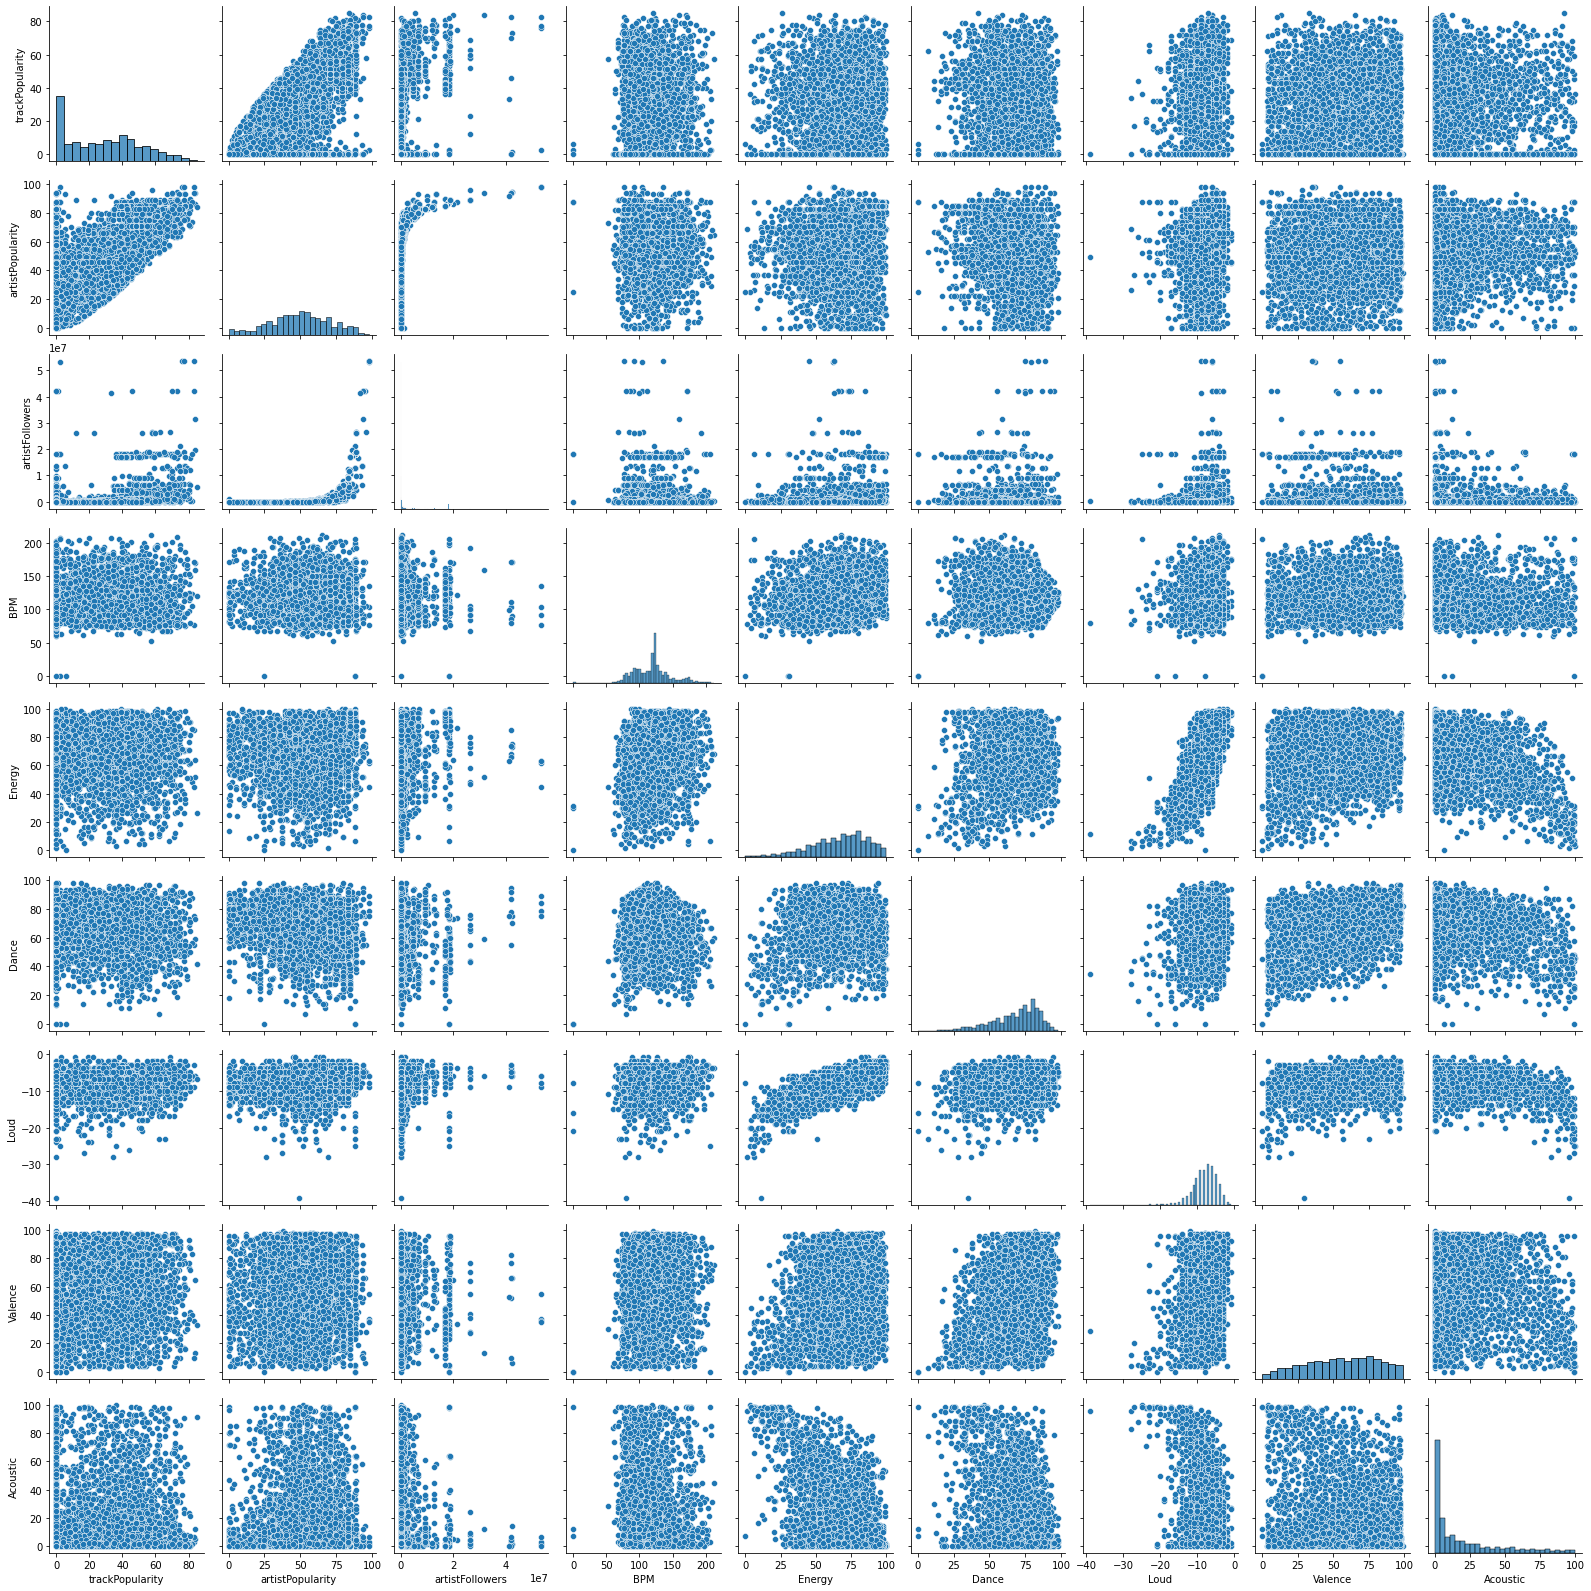

In [207]:
sns.pairplot(Dataset_all)

In [4]:
Dataset_all.columns

Index(['trackName', 'artistName', 'trackDuration', 'addedAt',
       'trackPopularity', 'artistPopularity', 'secondaryArtistsNames',
       'artistFollowers', 'albumRecordLabel', 'albumReleaseDate', 'BPM',
       'Energy', 'Dance', 'Loud', 'Valence', 'Acoustic', 'Genre1', 'Genre2',
       'Genre3', 'Genre4', 'Genre5'],
      dtype='object')

- ...

a) The most popular tracks in my playlists (based on "trackPopularity" feature)

In [7]:
Dataset_all_sort_track = Dataset_all.sort_values(by=["trackPopularity"])
Dataset_all_sort_track_top10 = Dataset_all_sort_track.tail(10)
#Dataset_all_sort_track_worst10 = Dataset_all_sort_track.head(10)

In [ ]:
Dataset_all_sort_track_top10.reset_index(inplace=True)

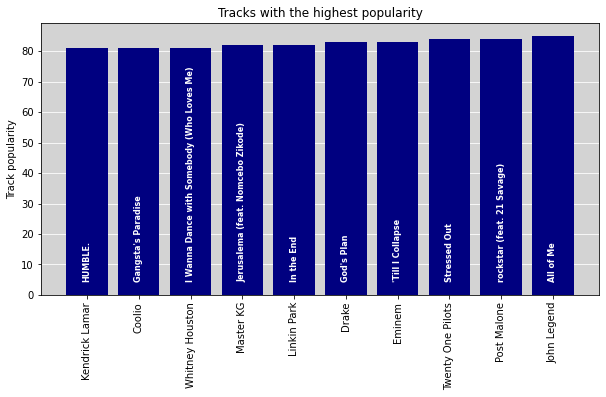

In [51]:
fig, ax = plt.subplots(figsize=(10,5))

ax.bar(Dataset_all_sort_track_top10["artistName"], Dataset_all_sort_track_top10["trackPopularity"], color = "navy", zorder=3)
ax.set_facecolor("lightgrey")
ax.grid(color="white", axis="y", zorder=0)
ax.tick_params(axis="x", rotation=90)
ax.set_title("Tracks with the highest popularity")
ax.set_ylabel("Track popularity")

y = Dataset_all_sort_track_top10["trackPopularity"].values
text = Dataset_all_sort_track_top10["trackName"]

for i in range(len(Dataset_all_sort_track_top10)):
    ax.text(x=i, 
        y=5, 
        s = text[i], color='white', ha = "center", rotation=90, fontweight = "bold", fontsize = 8)


plt.show()

b) The most popular artists in my playlists (based on "artistPopularity" feature)

In [55]:
Dataset_all_sort_artist = Dataset_all.sort_values(by=["artistPopularity"])
Dataset_all_sort_artist.drop_duplicates(subset="artistName", keep = "first", inplace=True)
Dataset_all_sort_artist_top10 = Dataset_all_sort_artist.tail(10)
Dataset_all_sort_artist_worst10 = Dataset_all_sort_artist.head(10)

In [56]:
Dataset_all_sort_artist_top10

,trackName,artistName,trackDuration,addedAt,trackPopularity,artistPopularity,secondaryArtistsNames,artistFollowers,albumRecordLabel,albumReleaseDate,...,Energy,Dance,Loud,Valence,Acoustic,Genre1,Genre2,Genre3,Genre4,Genre5
1432,Day 'N' Nite (Nightmare),Kid Cudi,00:03:41,2018-09-02 17:47:26,72,89.0,NaN,4634866.0,Kid Cudi/Universal Records,2009-01-01,...,44.0,88.0,-6.0,80.0,46.0,Hip hop,Ohio hip hop,Rap,NaN,NaN
1422,HUMBLE.,Kendrick Lamar,00:02:57,2018-09-02 17:27:28,81,90.0,NaN,16647990.0,Aftermath,2017-04-14,...,62.0,91.0,-7.0,42.0,0.0,Conscious hip hop,Hip hop,Rap,West coast rap,NaN
2285,Pon de Replay - Radio Edit,Rihanna,00:03:35,2018-09-02 17:46:43,33,92.0,NaN,41248464.0,Def Jam Recordings,2005-05-24,...,63.0,75.0,-9.0,53.0,0.0,Barbadian pop,Dance pop,Pop,Pop dance,Post-teen pop
1396,Mask Off,Future,00:03:24,2018-08-19 20:46:26,44,92.0,NaN,9936966.0,Epic/Freebandz/A1,2017-08-04,...,43.0,83.0,-9.0,28.0,1.0,Atl hip hop,Pop rap,Rap,Southern hip hop,Trap
1406,Stronger,Kanye West,00:05:11,2018-08-29 21:05:06,5,93.0,NaN,13423154.0,Universal Music Group,2007-09-11,...,72.0,62.0,-8.0,49.0,1.0,Chicago rap,Rap,NaN,NaN,NaN
1449,"Never Recover (Lil Baby & Gunna, Drake)",Lil Baby,00:03:14,2018-11-01 13:05:26,70,93.0,Gunna & Drake,6374561.0,Quality Control Music/Young Stoner Life Record...,2018-10-05,...,69.0,75.0,-5.0,89.0,7.0,Atl hip hop,Atl trap,Rap,Trap,NaN
1656,Without Me,Eminem,00:04:51,2018-08-29 21:09:28,0,94.0,NaN,41938950.0,Universal Music Group,2005-12-06,...,66.0,92.0,-3.0,66.0,0.0,Detroit hip hop,Hip hop,Rap,NaN,NaN
1425,rockstar (feat. 21 Savage),Post Malone,00:03:38,2018-09-02 17:34:04,84,94.0,21 Savage,31484142.0,Republic Records,2018-04-27,...,52.0,59.0,-6.0,13.0,12.0,Dfw rap,Melodic rap,Rap,NaN,NaN
764,Mi Gente,J Balvin,00:03:07,2018-08-22 20:58:12,58,96.0,Willy William,26377431.0,Columbia/B1 Recordings,2017-07-03,...,69.0,55.0,-5.0,28.0,2.0,Latin,Reggaeton,Reggaeton colombiano,Trap latino,NaN
1412,God's Plan,Drake,00:03:18,2018-09-02 16:07:37,83,98.0,NaN,53430958.0,Cash Money/Drake LP6,2018-06-29,...,45.0,75.0,-9.0,36.0,3.0,Canadian hip hop,Canadian pop,Hip hop,Pop rap,Rap


In [59]:
Dataset_all_sort_artist_worst10

,trackName,artistName,trackDuration,addedAt,trackPopularity,artistPopularity,secondaryArtistsNames,artistFollowers,albumRecordLabel,albumReleaseDate,...,Energy,Dance,Loud,Valence,Acoustic,Genre1,Genre2,Genre3,Genre4,Genre5
3205,Iboot Elibomvu,Dynamic deep,00:05:20,2020-05-11 21:24:31,0,0.0,Dj Kweila,8.0,SERENITY RECORDS SA,2019-07-19,...,78.0,81.0,-14.0,32.0,0.0,NaN,NaN,NaN,NaN,NaN
223,Maasai [Mixed],Duo Cues,00:05:29,2020-05-08 21:22:04,0,0.0,NaN,2.0,Surreal Sounds Music,2019-10-07,...,71.0,71.0,-11.0,20.0,12.0,NaN,NaN,NaN,NaN,NaN
2448,Mandinka Dream,Kouyaté,00:02:24,2020-10-28 22:35:14,0,0.0,Neerman,2.0,Uppm / Koka Media,2010-02-04,...,13.0,58.0,-17.0,11.0,99.0,NaN,NaN,NaN,NaN,NaN
226,Un Pris Pour La Terre,G.Washington,00:06:53,2020-05-08 21:22:50,0,0.0,T_Phoenix,10.0,Do You Be You Records,2019-06-28,...,58.0,75.0,-9.0,37.0,8.0,NaN,NaN,NaN,NaN,NaN
392,Warriors of Africa (Le Saint Remix),Boddhi Satva & Fredy Massamba,00:07:36,2020-10-04 18:39:57,0,0.0,NaN,68.0,Offering Recordings,2008-01-01,...,86.0,88.0,-5.0,39.0,11.0,NaN,NaN,NaN,NaN,NaN
761,Wicked,Various Artists,00:02:52,2018-08-22 20:53:49,0,0.0,Chi Ching Ching,1100731.0,Notnice Records,2017-01-20,...,72.0,91.0,-6.0,56.0,1.0,NaN,NaN,NaN,NaN,NaN
1287,Deep in Chicago,Funky Soldiers,00:04:03,2020-05-08 20:48:54,0,0.0,K-Alexi,6.0,Seamless Recordings,2009-06-08,...,72.0,80.0,-8.0,42.0,0.0,NaN,NaN,NaN,NaN,NaN
333,One for GeeGo,Fizzpop,00:07:21,2020-05-09 21:15:18,0,0.0,BlaQRhythm,4.0,GeeGo Africa,2020-01-24,...,68.0,61.0,-14.0,55.0,0.0,NaN,NaN,NaN,NaN,NaN
3010,The Panic,Stems,00:02:55,2020-01-26 23:12:12,0,0.0,NaN,112.0,Stems,2016-03-01,...,93.0,18.0,-5.0,58.0,0.0,NaN,NaN,NaN,NaN,NaN
340,Azania Deep - Casamena Deep Remix,Azania Brothers,00:06:18,2020-05-10 21:06:24,0,0.0,CASAMENA & Carlos Mena,3.0,Ocha Records,2019-12-13,...,84.0,81.0,-11.0,87.0,0.0,NaN,NaN,NaN,NaN,NaN


In [57]:
Dataset_all_sort_followers = Dataset_all.sort_values(by=["artistFollowers"])
Dataset_all_sort_followers.drop_duplicates(subset="artistName", keep = "first", inplace=True)
Dataset_all_sort_followers_top10 = Dataset_all_sort_followers.tail(10)
Dataset_all_sort_followers_worst10 = Dataset_all_sort_followers.head(10)

In [58]:
Dataset_all_sort_followers_top10

,trackName,artistName,trackDuration,addedAt,trackPopularity,artistPopularity,secondaryArtistsNames,artistFollowers,albumRecordLabel,albumReleaseDate,...,Energy,Dance,Loud,Valence,Acoustic,Genre1,Genre2,Genre3,Genre4,Genre5
1972,Easier to Run,Linkin Park,00:03:24,2018-08-29 21:23:41,54,88.0,NaN,18099118.0,Warner Records,2003-03-24,...,86.0,55.0,-5.0,28.0,6.0,Alternative metal,Nu metal,Post-grunge,Rap metal,NaN
2374,Let It Be - Remastered 2009,The Beatles,00:04:03,2018-09-10 19:41:51,77,89.0,NaN,18748196.0,EMI Catalogue,1970-05-08,...,40.0,44.0,-8.0,41.0,63.0,Beatlesque,British invasion,Classic rock,Merseybeat,Psychedelic rock
1423,Stressed Out,Twenty One Pilots,00:03:22,2018-09-02 17:31:02,84,86.0,NaN,19724480.0,Fueled By Ramen,2015-05-15,...,64.0,73.0,-6.0,65.0,5.0,Modern rock,Rock,NaN,NaN,NaN
1048,How Deep Is Your Love,Calvin Harris,00:03:32,2020-10-24 19:59:56,75,88.0,Disciples,21258012.0,Columbia,2015-07-17,...,87.0,74.0,-4.0,34.0,4.0,Dance pop,Edm,Electro house,House,Pop
2408,Single Ladies (Put a Ring on It),Beyoncé,00:03:13,2020-11-08 22:57:23,60,89.0,NaN,26229322.0,Music World Music/Columbia,2008-11-12,...,58.0,43.0,-5.0,27.0,4.0,Dance pop,Pop,Pop dance,Post-teen pop,R&b
764,Mi Gente,J Balvin,00:03:07,2018-08-22 20:58:12,58,96.0,Willy William,26377431.0,Columbia/B1 Recordings,2017-07-03,...,69.0,55.0,-5.0,28.0,2.0,Latin,Reggaeton,Reggaeton colombiano,Trap latino,NaN
1425,rockstar (feat. 21 Savage),Post Malone,00:03:38,2018-09-02 17:34:04,84,94.0,21 Savage,31484142.0,Republic Records,2018-04-27,...,52.0,59.0,-6.0,13.0,12.0,Dfw rap,Melodic rap,Rap,NaN,NaN
2285,Pon de Replay - Radio Edit,Rihanna,00:03:35,2018-09-02 17:46:43,33,92.0,NaN,41248464.0,Def Jam Recordings,2005-05-24,...,63.0,75.0,-9.0,53.0,0.0,Barbadian pop,Dance pop,Pop,Pop dance,Post-teen pop
1656,Without Me,Eminem,00:04:51,2018-08-29 21:09:28,0,94.0,NaN,41938950.0,Universal Music Group,2005-12-06,...,66.0,92.0,-3.0,66.0,0.0,Detroit hip hop,Hip hop,Rap,NaN,NaN
647,One Dance,Drake,00:02:53,2018-08-19 20:44:30,2,98.0,WizKid & Kyla,53137907.0,Universal Music Group,2016-05-06,...,62.0,79.0,-6.0,37.0,1.0,Canadian hip hop,Canadian pop,Hip hop,Pop rap,Rap


In [60]:
Dataset_all_sort_followers_worst10

,trackName,artistName,trackDuration,addedAt,trackPopularity,artistPopularity,secondaryArtistsNames,artistFollowers,albumRecordLabel,albumReleaseDate,...,Energy,Dance,Loud,Valence,Acoustic,Genre1,Genre2,Genre3,Genre4,Genre5
318,Ngyabaleka,S.G.I,00:07:12,2020-05-08 22:13:05,0,0.0,NaN,1.0,DM.Recordings,2020-04-17,...,78.0,73.0,-6.0,91.0,6.0,NaN,NaN,NaN,NaN,NaN
861,Misconception (feat. Mahume),D General,00:06:35,2020-05-08 21:01:48,0,0.0,Mahume,1.0,Open Bar Music,2016-10-13,...,88.0,61.0,-10.0,47.0,3.0,NaN,NaN,NaN,NaN,NaN
785,Haffi Come Back,Cherine,00:03:05,2018-10-04 15:48:21,0,0.0,NaN,1.0,UIM Records,2012-05-04,...,93.0,53.0,-4.0,50.0,20.0,NaN,NaN,NaN,NaN,NaN
222,Maasai - Original Afro Mix,Duo Cues,00:07:19,2020-05-08 21:21:53,0,0.0,NaN,2.0,Surreal Sounds Music,2019-11-20,...,67.0,73.0,-12.0,15.0,3.0,NaN,NaN,NaN,NaN,NaN
2448,Mandinka Dream,Kouyaté,00:02:24,2020-10-28 22:35:14,0,0.0,Neerman,2.0,Uppm / Koka Media,2010-02-04,...,13.0,58.0,-17.0,11.0,99.0,NaN,NaN,NaN,NaN,NaN
1090,The Copperhead Moan,Mr. Kazzmatic,00:03:03,2020-09-13 00:16:06,0,2.0,NaN,3.0,Soundfile Records,2014-12-29,...,84.0,75.0,-8.0,45.0,41.0,NaN,NaN,NaN,NaN,NaN
340,Azania Deep - Casamena Deep Remix,Azania Brothers,00:06:18,2020-05-10 21:06:24,0,0.0,CASAMENA & Carlos Mena,3.0,Ocha Records,2019-12-13,...,84.0,81.0,-11.0,87.0,0.0,NaN,NaN,NaN,NaN,NaN
439,Mzansfree,Transatlantic Soundsystem,00:06:35,2020-11-08 21:18:19,0,0.0,104 BPM & Coflo,4.0,Ocha Mzansi,2019-06-07,...,70.0,79.0,-6.0,18.0,4.0,NaN,NaN,NaN,NaN,NaN
710,Weddy Time,Voice Mail (feat. Delly Ranx & Bogle),00:03:42,2018-08-22 20:04:14,8,2.0,NaN,4.0,VP Records,2006-01-01,...,67.0,68.0,-7.0,90.0,26.0,NaN,NaN,NaN,NaN,NaN
1366,Get UP (Original Mix),Boddhi Satva Feat Robert Walker,00:06:24,2020-09-25 16:50:04,0,0.0,NaN,4.0,Seed Recordings,2007-01-01,...,46.0,90.0,-13.0,51.0,0.0,NaN,NaN,NaN,NaN,NaN


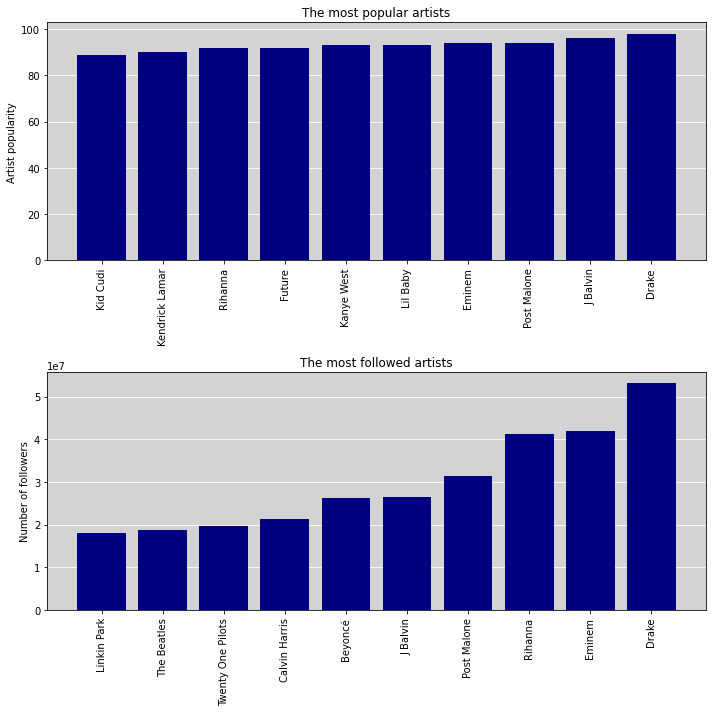

In [66]:
fig, ax = plt.subplots(2, figsize=(10,10))

ax[0].bar(Dataset_all_sort_artist_top10["artistName"], Dataset_all_sort_artist_top10["artistPopularity"], color = "navy", zorder=3)
ax[0].set_facecolor("lightgrey")
ax[0].grid(color="white", axis="y", zorder=0)
ax[0].tick_params(axis="x", rotation=90)
ax[0].set_title("The most popular artists")
ax[0].set_ylabel("Artist popularity")

ax[1].bar(Dataset_all_sort_followers_top10["artistName"], Dataset_all_sort_followers_top10["artistFollowers"], color = "navy", zorder=3)
ax[1].set_facecolor("lightgrey")
ax[1].grid(color="white", axis="y", zorder=0)
ax[1].tick_params(axis="x", rotation=90)
ax[1].set_title("The most followed artists")
ax[1].set_ylabel("Number of followers")

plt.tight_layout()
plt.show()

c) My top genres

In [72]:
Top_genres = Dataset_all.groupby(["Genre1"]).count().sort_values(by=["trackName"], ascending=False)
Top_genres_20 = Top_genres.head(20)

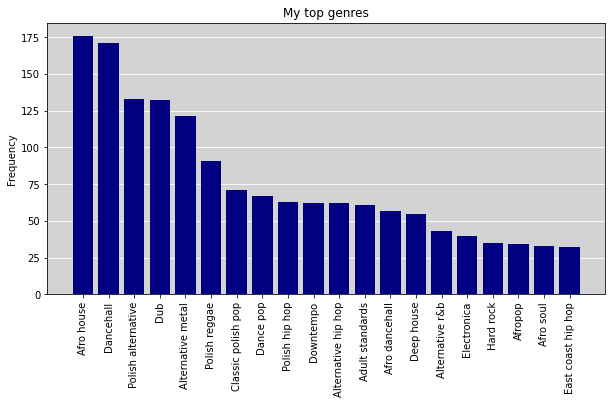

In [76]:
fig, ax = plt.subplots(figsize=(10,5))

ax.bar(Top_genres_20.index.values, Top_genres_20["trackName"], color = "navy", zorder=3)
ax.set_facecolor("lightgrey")
ax.grid(color="white", axis="y", zorder=0)
ax.tick_params(axis="x", rotation=90)
ax.set_title("My top genres")
ax.set_ylabel("Frequency")


plt.show()


d) Release dates - oldies or rather new music?

In [77]:
Dataset_all.head()

,trackName,artistName,trackDuration,addedAt,trackPopularity,artistPopularity,secondaryArtistsNames,artistFollowers,albumRecordLabel,albumReleaseDate,...,Energy,Dance,Loud,Valence,Acoustic,Genre1,Genre2,Genre3,Genre4,Genre5
0,"My Woman, My Everything (feat. Wandecoal)",Patoranking,00:03:53,2018-08-19 20:44:37,54,61.0,Wande Coal,149884.0,Greensleeves Records,2015-07-06,...,85.0,90.0,-3.0,63.0,4.0,Afro dancehall,Afropop,Azontobeats,Gqom,Nigerian pop
1,Pana,Tekno,00:04:02,2018-08-19 20:51:51,59,62.0,NaN,175849.0,Columbia,2016-12-20,...,55.0,55.0,-7.0,66.0,31.0,Afro dancehall,Afropop,Azontobeats,Nigerian hip hop,Nigerian pop
2,Jogodo,Tekno,00:04:23,2018-08-19 20:51:54,44,62.0,NaN,175849.0,MADE MEN MUSIC GROUP,2018-04-19,...,77.0,74.0,-5.0,82.0,38.0,Afro dancehall,Afropop,Azontobeats,Nigerian hip hop,Nigerian pop
3,Duro,Tekno,00:03:32,2018-08-19 20:52:04,0,62.0,NaN,175849.0,Made Men Music Group,2015-06-22,...,84.0,74.0,-4.0,97.0,28.0,Afro dancehall,Afropop,Azontobeats,Nigerian hip hop,Nigerian pop
4,Samantha,Tekno,00:03:49,2018-08-19 20:52:24,42,62.0,NaN,175849.0,MADE MEN MUSIC GROUP,2017-06-09,...,75.0,83.0,-3.0,79.0,3.0,Afro dancehall,Afropop,Azontobeats,Nigerian hip hop,Nigerian pop


In [79]:
Dataset_all_release = Dataset_all[["trackName", "artistName", "albumReleaseDate"]]

In [80]:
Dataset_all_release["year"] = Dataset_all_release["albumReleaseDate"].dt.year

<ipython-input-80-5b0debe04432>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset_all_release["year"] = Dataset_all_release["albumReleaseDate"].dt.year


In [85]:
Dataset_all_release_year = Dataset_all_release.groupby(["year"]).count().sort_values(by=["trackName"], ascending=False)
Dataset_all_release_year.head(20)

,trackName,artistName,albumReleaseDate
year,,,
2018,360,360,360
2017,338,338,338
2019,243,243,243
2016,241,241,241
2020,194,194,194
2015,191,191,191
2014,184,184,184
2011,123,123,123
2012,119,119,119


In [89]:
Dataset_all_release_year2 = Dataset_all_release.groupby(["year"]).count().sort_values(by=["year"], ascending=False)
Dataset_all_release_year2.tail(10)

,trackName,artistName,albumReleaseDate
year,,,
1965,4,4,4
1964,2,2,2
1963,4,4,4
1962,3,3,3
1961,3,3,3
1959,4,4,4
1958,2,2,2
1957,2,2,2
1956,3,3,3


e) The most popular record labels

In [95]:
Top_labels = Dataset_all.groupby(["albumRecordLabel"]).count().sort_values(by=["trackName"], ascending=False)
Top_labels_20 = Top_labels.head(20)

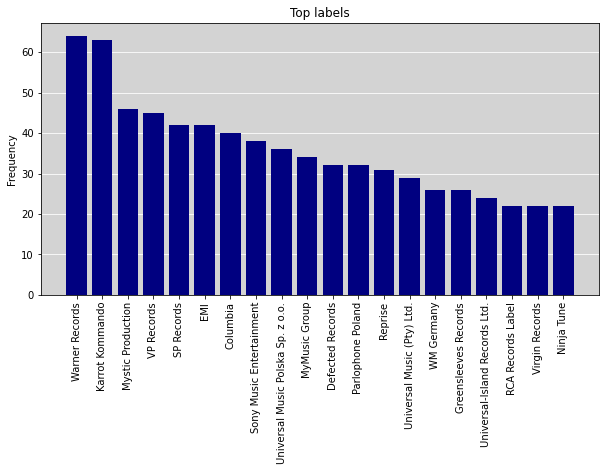

In [96]:
fig, ax = plt.subplots(figsize=(10,5))

ax.bar(Top_labels_20.index.values, Top_labels_20["trackName"], color = "navy", zorder=3)
ax.set_facecolor("lightgrey")
ax.grid(color="white", axis="y", zorder=0)
ax.tick_params(axis="x", rotation=90)
ax.set_title("Top labels")
ax.set_ylabel("Frequency")


plt.show()

**5) Analysis of selected playlists** 

a) Are various Afro genres similar?

In [2]:
AfroClassics = pd.read_csv("C:/Users/Agnieszka/Downloads/Datasets/Music/MyDatasets/EDA_Afrobeat_AfricanClassics.csv")
Afrobeats = pd.read_csv("C:/Users/Agnieszka/Downloads/Datasets/Music/MyDatasets/EDA_Afrobeats.csv")
AfroHouse = pd.read_csv("C:/Users/Agnieszka/Downloads/Datasets/Music/MyDatasets/EDA_AfroHouse.csv")
Kuduro = pd.read_csv("C:/Users/Agnieszka/Downloads/Datasets/Music/MyDatasets/EDA_Kuduro.csv")
SA = pd.read_csv("C:/Users/Agnieszka/Downloads/Datasets/Music/MyDatasets/EDA_SA_sounds.csv")

In [20]:
def averages ():
    # Calculate average values for features: Energy, Danceability, Loudness, Valence, Acousticness, BPM
    mean_AfroClassics = []
    for column in AfroClassics[["Energy", "Dance", "Loud", "Valence", "Acoustic", "BPM"]]:
        avg = AfroClassics[column].mean()
        mean_AfroClassics.append(avg)
    # Add the first list value at the end of the list to close the radar chart
    mean_AfroClassics = np.concatenate((mean_AfroClassics, [mean_AfroClassics[0]]))
    
    mean_Afrobeats = []
    for column in Afrobeats[["Energy", "Dance", "Loud", "Valence", "Acoustic", "BPM"]]:
        avg2 = Afrobeats[column].mean()
        mean_Afrobeats.append(avg2)
    mean_Afrobeats = np.concatenate((mean_Afrobeats, [mean_Afrobeats[0]]))
    
    mean_AfroHouse = []
    for column in AfroHouse[["Energy", "Dance", "Loud", "Valence", "Acoustic", "BPM"]]:
        avg3 = AfroHouse[column].mean()
        mean_AfroHouse.append(avg3)
    mean_AfroHouse = np.concatenate((mean_AfroHouse, [mean_AfroHouse[0]]))
    
    mean_Kuduro = []
    for column in Kuduro[["Energy", "Dance", "Loud", "Valence", "Acoustic", "BPM"]]:
        avg4 = Kuduro[column].mean()
        mean_Kuduro.append(avg4)
    mean_Kuduro = np.concatenate((mean_Kuduro, [mean_Kuduro[0]]))
    
    mean_SA = []
    for column in SA[["Energy", "Dance", "Loud", "Valence", "Acoustic", "BPM"]]:
        avg5 = SA[column].mean()
        mean_SA.append(avg5)
    mean_SA = np.concatenate((mean_SA, [mean_SA[0]]))
    
    return mean_AfroClassics, mean_Afrobeats,  mean_AfroHouse, mean_Kuduro, mean_SA

In [21]:
mean_AfroClassics, mean_Afrobeats,  mean_AfroHouse, mean_Kuduro, mean_SA = averages()

In [22]:
mean_Afrobeats

array([ 72.28225806,  78.08870968,  -5.83064516,  69.        ,
        19.99193548, 117.0483871 ,  72.28225806])

In [42]:
features = ["Energy", "Danceability", "Loudness", "Valence", "Acousticness", "BPM"]

In [33]:
# Calculate evenly-spaced angle coordinates
# radians: 2*np.pi = 360 deg
labels_position = np.linspace(start=0, stop=2*np.pi, num=len(mean_Afrobeats))

In [34]:
labels_position

array([0.        , 1.04719755, 2.0943951 , 3.14159265, 4.1887902 ,
       5.23598776, 6.28318531])

In [35]:
np.degrees(labels_position)

array([  0.,  60., 120., 180., 240., 300., 360.])

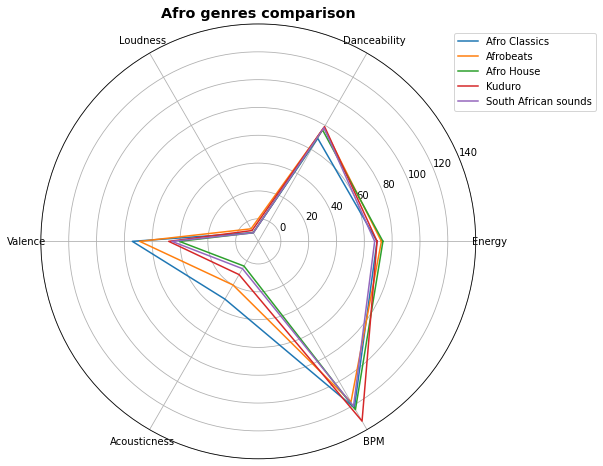

In [76]:
# Create a radar chart to compare features for each genre
plt.figure(figsize=(8,8))
plt.subplot(polar=True)
plt.plot(labels_position, mean_AfroClassics)
plt.plot(labels_position, mean_Afrobeats)
plt.plot(labels_position, mean_AfroHouse)
plt.plot(labels_position, mean_Kuduro)
plt.plot(labels_position, mean_SA)
# Thetagrids to place labels at the specified angles (deg)

# delete first item in an array due to error: The number of FixedLocator locations (7), usually from a call to 
# set_ticks, does not match the number of ticklabels (6).
labels_position2 = np.delete(labels_position, -1)
lines, labels = plt.thetagrids(np.degrees(labels_position2), labels = features)
plt.title("Afro genres comparison", weight="bold", size="x-large")
plt.legend(labels=["Afro Classics", "Afrobeats", "Afro House", "Kuduro", "South African sounds"], loc=(0.95, 0.8))
plt.show()

# https://www.youtube.com/watch?v=JC3PKoIX0ZE

# How to change/ adjust the label position:
# https://stackoverflow.com/questions/55424352/add-gap-between-label-and-radar-chart-in-matplotlib

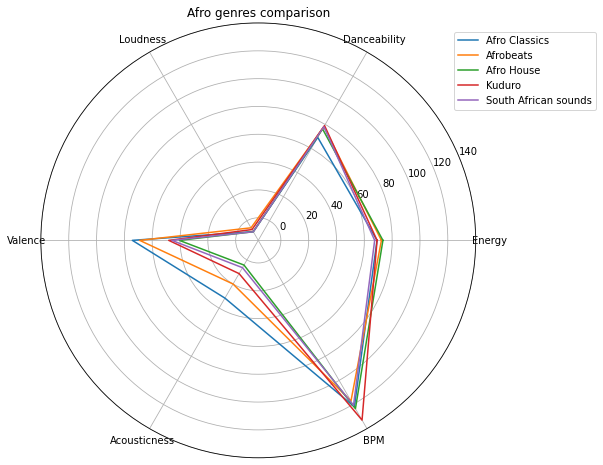

In [75]:
# Create a radar chart to compare features for each genre
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(polar=True)
ax.plot(labels_position, mean_AfroClassics)
ax.plot(labels_position, mean_Afrobeats)
ax.plot(labels_position, mean_AfroHouse)
ax.plot(labels_position, mean_Kuduro)
ax.plot(labels_position, mean_SA)
# Thetagrids to place labels at the specified angles (deg)

# delete first item in an array due to error:
# The number of FixedLocator locations (7), usually from a call to set_ticks, 
# does not match the number of ticklabels (6).
labels_position2 = np.delete(labels_position, -1)
ax.set_thetagrids(np.degrees(labels_position2), labels = features)
ax.set_title("Afro genres comparison")
ax.legend(labels=["Afro Classics", "Afrobeats", "Afro House", "Kuduro", "South African sounds"], loc=(0.95, 0.8))
plt.show()

# https://www.youtube.com/watch?v=YchOrmpjvSs

In [60]:
# Radar (Spider) chart with plotly

import plotly.offline as pyo

In [68]:
#np.degrees(labels_position)
features2 = np.concatenate((features, [features[0]]))
fig = go.Figure(
    data=[go.Scatterpolar(r=mean_AfroClassics, theta=features2, name="Afro Classics"),
         go.Scatterpolar(r=mean_Afrobeats, theta=features2, name="Afrobeats"),
         go.Scatterpolar(r=mean_AfroHouse, theta=features2, name="Afro House"),
         go.Scatterpolar(r=mean_Kuduro, theta=features2, name="Kuduro"),
         go.Scatterpolar(r=mean_SA, theta=features2, name="South African sounds")],
    layout=go.Layout(
        title=go.layout.Title(text="Afro genres comparison"),
        #polar={"radialaxis": {"visible":True}},
        showlegend=True))
fig.show()
pyo.plot(fig)

# https://towardsdatascience.com/how-to-make-stunning-radar-charts-with-python-implemented-in-matplotlib-and-plotly-91e21801d8ca

'temp-plot.html'

b) What about various Jamaican music genres?

In [69]:
Roots = pd.read_csv("C:/Users/Agnieszka/Downloads/Datasets/Music/MyDatasets/EDA_Roots.csv")
Dancehall = pd.read_csv("C:/Users/Agnieszka/Downloads/Datasets/Music/MyDatasets/EDA_Dancehall.csv")
Dub = pd.read_csv("C:/Users/Agnieszka/Downloads/Datasets/Music/MyDatasets/EDA_Dub.csv")
ModernRoots = pd.read_csv("C:/Users/Agnieszka/Downloads/Datasets/Music/MyDatasets/EDA_ModernRoots.csv")

In [72]:
def averages2():
    # Calculate average values for features: Energy, Danceability, Loudness, Valence, Acousticness, BPM
    mean_Roots = []
    for column in Roots[["Energy", "Dance", "Loud", "Valence", "Acoustic", "BPM"]]:
        avg = Roots[column].mean()
        mean_Roots.append(avg)
    # Add the first list value at the end of the list to close the radar chart
    mean_Roots = np.concatenate((mean_Roots, [mean_Roots[0]]))
    
    mean_Dancehall  = []
    for column in Dancehall [["Energy", "Dance", "Loud", "Valence", "Acoustic", "BPM"]]:
        avg2 = Dancehall [column].mean()
        mean_Dancehall .append(avg2)
    mean_Dancehall  = np.concatenate((mean_Dancehall , [mean_Dancehall [0]]))
    
    mean_Dub = []
    for column in Dub[["Energy", "Dance", "Loud", "Valence", "Acoustic", "BPM"]]:
        avg3 = Dub[column].mean()
        mean_Dub.append(avg3)
    mean_Dub = np.concatenate((mean_Dub, [mean_Dub[0]]))
    
    mean_ModernRoots = []
    for column in ModernRoots[["Energy", "Dance", "Loud", "Valence", "Acoustic", "BPM"]]:
        avg4 = ModernRoots[column].mean()
        mean_ModernRoots.append(avg4)
    mean_ModernRoots = np.concatenate((mean_ModernRoots, [mean_ModernRoots[0]]))
    
    return mean_Roots, mean_Dancehall, mean_Dub, mean_ModernRoots

In [73]:
mean_Roots, mean_Dancehall, mean_Dub, mean_ModernRoots = averages2()

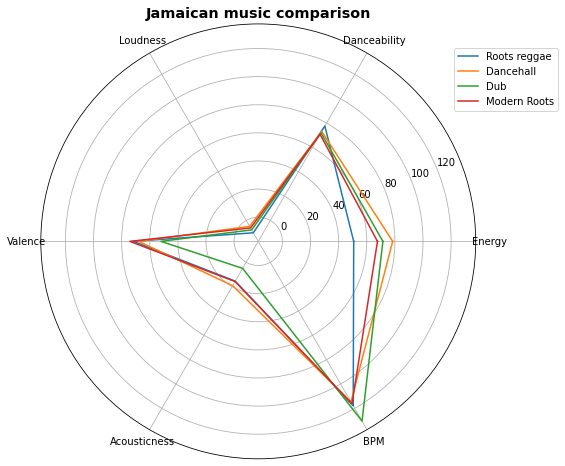

In [79]:
# Create a radar chart to compare features for each genre
plt.figure(figsize=(8,8))
plt.subplot(polar=True)
plt.plot(labels_position, mean_Roots)
plt.plot(labels_position, mean_Dancehall)
plt.plot(labels_position, mean_Dub)
plt.plot(labels_position, mean_ModernRoots)
# Thetagrids to place labels at the specified angles (deg)

# delete first item in an array due to error: The number of FixedLocator locations (7), usually from a call to 
# set_ticks, does not match the number of ticklabels (6).
labels_position2 = np.delete(labels_position, -1)
lines, labels = plt.thetagrids(np.degrees(labels_position2), labels = features)
plt.title("Jamaican music comparison", weight="bold", size="x-large")
plt.legend(labels=["Roots reggae", "Dancehall", "Dub", "Modern Roots"], loc=(0.95, 0.8))
plt.show()

c) Hip Hop vs. Oldschool Hip Hop 

In [80]:
HipHop = pd.read_csv("C:/Users/Agnieszka/Downloads/Datasets/Music/MyDatasets/EDA_HipHop.csv")
HipHop_Old = pd.read_csv("C:/Users/Agnieszka/Downloads/Datasets/Music/MyDatasets/EDA_HipHopOldschool.csv")

In [90]:
def averages3():
    # Calculate average values for features: Energy, Danceability, Loudness, Valence, Acousticness, BPM
    mean_HipHop  = []
    for column in HipHop [["Energy", "Dance", "Loud", "Valence", "Acoustic", "BPM"]]:
        avg = HipHop [column].mean()
        mean_HipHop .append(avg)
    # Add the first list value at the end of the list to close the radar chart
    mean_HipHop  = np.concatenate((mean_HipHop , [mean_HipHop [0]]))
    
    mean_HipHop_Old = []
    for column in HipHop_Old[["Energy", "Dance", "Loud", "Valence", "Acoustic", "BPM"]]:
        avg2 = HipHop_Old[column].mean()
        mean_HipHop_Old.append(avg2)
    mean_HipHop_Old  = np.concatenate((mean_HipHop_Old , [mean_HipHop_Old[0]]))
    
    return mean_HipHop_Old, mean_HipHop

In [91]:
mean_HipHop_Old, mean_HipHop = averages3()

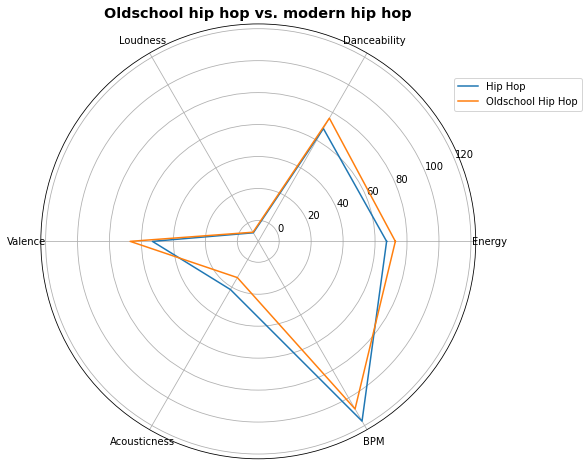

In [93]:
# Create a radar chart to compare features for each genre
plt.figure(figsize=(8,8))
plt.subplot(polar=True)
plt.plot(labels_position, mean_HipHop)
plt.plot(labels_position, mean_HipHop_Old)

# Thetagrids to place labels at the specified angles (deg)

# delete first item in an array due to error: The number of FixedLocator locations (7), usually from a call to 
# set_ticks, does not match the number of ticklabels (6).
labels_position2 = np.delete(labels_position, -1)
lines, labels = plt.thetagrids(np.degrees(labels_position2), labels = features)
plt.title("Oldschool hip hop vs. modern hip hop", weight="bold", size="x-large")
plt.legend(labels=["Hip Hop", "Oldschool Hip Hop", ], loc=(0.95, 0.8))
plt.show()

d) Similarities / Differences between rock, jazz, reggae, house, afrobeats and hip hop

In [85]:
FunkSoulDisco = pd.read_csv("C:/Users/Agnieszka/Downloads/Datasets/Music/MyDatasets/EDA_FunkSoulDisco.csv")
Jazz = pd.read_csv("C:/Users/Agnieszka/Downloads/Datasets/Music/MyDatasets/EDA_Jazz_inst.csv")
Rock = pd.read_csv("C:/Users/Agnieszka/Downloads/Datasets/Music/MyDatasets/EDA_Rock.csv")
House = pd.read_csv("C:/Users/Agnieszka/Downloads/Datasets/Music/MyDatasets/EDA_DeepHouse.csv")
#HipHop_Old
#Roots
#Afrobeats / AfroClassics

In [87]:
def averages4():
    # Calculate average values for features: Energy, Danceability, Loudness, Valence, Acousticness, BPM
    mean_FunkSoulDisco = []
    for column in FunkSoulDisco[["Energy", "Dance", "Loud", "Valence", "Acoustic", "BPM"]]:
        avg = FunkSoulDisco[column].mean()
        mean_FunkSoulDisco.append(avg)
    # Add the first list value at the end of the list to close the radar chart
    mean_FunkSoulDisco = np.concatenate((mean_FunkSoulDisco, [mean_FunkSoulDisco[0]]))
    
    mean_Jazz = []
    for column in Jazz[["Energy", "Dance", "Loud", "Valence", "Acoustic", "BPM"]]:
        avg2 = Jazz[column].mean()
        mean_Jazz.append(avg2)
    mean_Jazz  = np.concatenate((mean_Jazz , [mean_Jazz[0]]))
    
    mean_Rock = []
    for column in Rock[["Energy", "Dance", "Loud", "Valence", "Acoustic", "BPM"]]:
        avg3 = Rock[column].mean()
        mean_Rock.append(avg3)
    mean_Rock = np.concatenate((mean_Rock, [mean_Rock[0]]))
    
    mean_House = []
    for column in House[["Energy", "Dance", "Loud", "Valence", "Acoustic", "BPM"]]:
        avg4 = House[column].mean()
        mean_House.append(avg4)
    mean_House = np.concatenate((mean_House, [mean_House[0]]))
    
    return mean_FunkSoulDisco, mean_Jazz, mean_Rock, mean_House

In [88]:
mean_FunkSoulDisco, mean_Jazz, mean_Rock, mean_House = averages4()

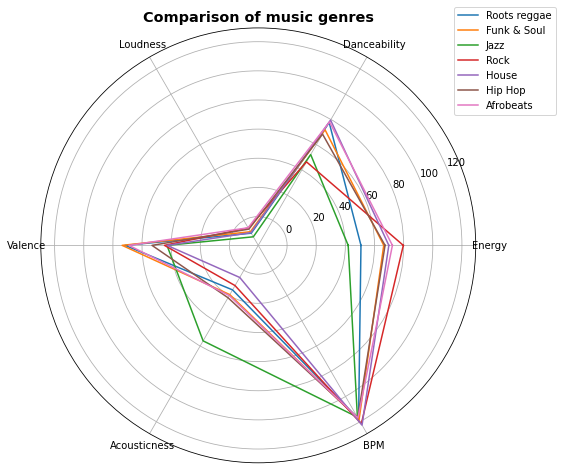

In [92]:
# Create a radar chart to compare features for each genre
plt.figure(figsize=(8,8))
plt.subplot(polar=True)
plt.plot(labels_position, mean_Roots)
plt.plot(labels_position, mean_FunkSoulDisco)
plt.plot(labels_position, mean_Jazz)
plt.plot(labels_position, mean_Rock)
plt.plot(labels_position, mean_House)
plt.plot(labels_position, mean_HipHop)
plt.plot(labels_position, mean_Afrobeats)
# Thetagrids to place labels at the specified angles (deg)

# delete first item in an array due to error: The number of FixedLocator locations (7), usually from a call to 
# set_ticks, does not match the number of ticklabels (6).
labels_position2 = np.delete(labels_position, -1)
lines, labels = plt.thetagrids(np.degrees(labels_position2), labels = features)
plt.title("Comparison of music genres", weight="bold", size="x-large")
plt.legend(labels=["Roots reggae", "Funk & Soul", "Jazz", "Rock", "House", "Hip Hop", "Afrobeats"], loc=(0.95, 0.8))
plt.show()

In [ ]:
# to be continued...
# - Dashboard (Dash Plotly)